# **Gathering Data**

# **PREPOCESSING**

EDA COMBINED DATA

In [ ]:
pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [ ]:
import os
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install gdown
import gdown
import zipfile
import os

# URL Google Drive untuk file jenis-penyakit.zip
url = 'https://drive.google.com/uc?id=16YpqeG_OQxPzpkPYid_df6DHEpP_M4eb'  # ID file dari link

# Nama output file zip
output = 'jenis-penyakit.zip'

# Download file zip
gdown.download(url, output, quiet=False)
# Path ke file zip
zip_path = 'jenis-penyakit.zip'

# Membuat folder untuk ekstraksi
extract_folder = 'jenis-penyakit'
os.makedirs(extract_folder, exist_ok=True)

# Ekstraksi file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"File berhasil diekstrak ke folder: {extract_folder}")



Downloading...
From (original): https://drive.google.com/uc?id=16YpqeG_OQxPzpkPYid_df6DHEpP_M4eb
From (redirected): https://drive.google.com/uc?id=16YpqeG_OQxPzpkPYid_df6DHEpP_M4eb&confirm=t&uuid=fc83dec7-b4c3-49a3-a620-4321d677a274
To: /content/jenis-penyakit.zip
100%|██████████| 271M/271M [00:07<00:00, 35.1MB/s]


File berhasil diekstrak ke folder: jenis-penyakit


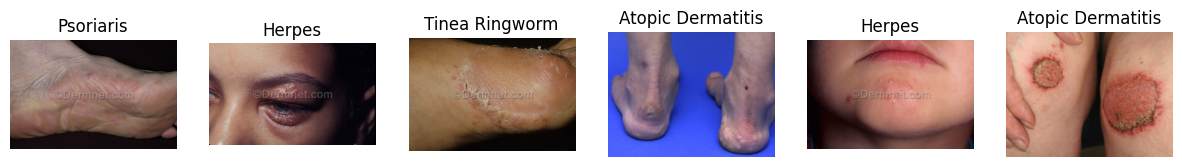

<ipython-input-4-47086256edf0>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')


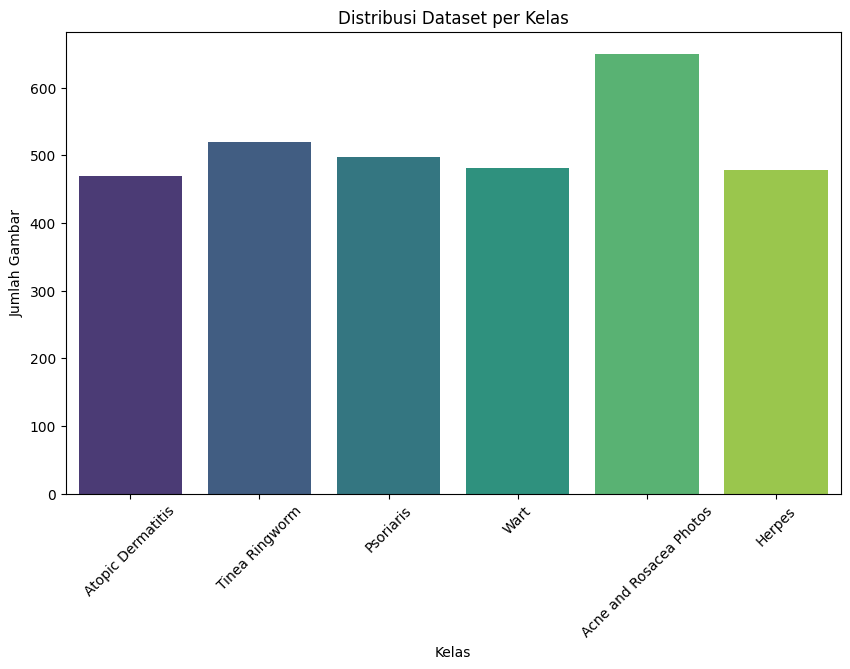

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# Path ke folder combined_se
combined_dir = 'jenis-penyakit/jenis-penyakit'

# Mendapatkan daftar kelas (folder dalam combined_set)
classes = [d for d in os.listdir(combined_dir) if os.path.isdir(os.path.join(combined_dir, d))]

# Menghitung jumlah gambar di setiap kelas
class_counts = {}
for class_name in classes:
    class_folder = os.path.join(combined_dir, class_name)
    class_counts[class_name] = len(os.listdir(class_folder))

# Menampilkan beberapa gambar secara acak
def display_random_images(combined_dir, classes, num_images=6):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        # Pilih kelas dan gambar secara acak
        class_name = random.choice(classes)
        class_folder = os.path.join(combined_dir, class_name)
        image_name = random.choice(os.listdir(class_folder))
        image_path = os.path.join(class_folder, image_name)

        # Buka dan tampilkan gambar
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(class_name)
    plt.show()

# Menampilkan distribusi kelas
def plot_class_distribution(class_counts):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')
    plt.title('Distribusi Dataset per Kelas')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah Gambar')
    plt.xticks(rotation=45)
    plt.show()

# Menjalankan fungsi untuk EDA
display_random_images(combined_dir, classes)
plot_class_distribution(class_counts)


Cek size gambar

In [ ]:
import os
from PIL import Image

# Path ke folder combined_set
combined_dir = 'jenis-penyakit/jenis-penyakit'

# Ukuran yang diharapkan (misalnya 224x224)
expected_size = (224, 224)

# Fungsi untuk mengecek ukuran gambar
def check_image_sizes(source_dir, expected_size):
    incorrect_size_images = []  # Untuk menyimpan gambar dengan ukuran tidak sesuai

    for class_name in os.listdir(source_dir):
        class_folder = os.path.join(source_dir, class_name)

        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            # Membuka gambar dan memeriksa ukurannya
            with Image.open(image_path) as img:
                if img.size != expected_size:
                    incorrect_size_images.append((image_path, img.size))

    # Menampilkan hasil
    if len(incorrect_size_images) == 0:
        print(f"Semua gambar berukuran {expected_size}.")
    else:
        print(f"Ada {len(incorrect_size_images)} gambar yang tidak berukuran {expected_size}:")
        for image_path, size in incorrect_size_images[:10]:  # Tampilkan maksimum 10 gambar
            print(f"{image_path} - Ukuran: {size}")

# Menjalankan pengecekan
check_image_sizes(combined_dir, expected_size)


Ada 3095 gambar yang tidak berukuran (224, 224):
jenis-penyakit/jenis-penyakit/Atopic Dermatitis/t-05Eczema1006.jpg - Ukuran: (720, 472)
jenis-penyakit/jenis-penyakit/Atopic Dermatitis/t-05AtopicDerm0419046.jpg - Ukuran: (720, 472)
jenis-penyakit/jenis-penyakit/Atopic Dermatitis/t-05atopicFeet0823043.jpg - Ukuran: (480, 720)
jenis-penyakit/jenis-penyakit/Atopic Dermatitis/1_53.jpg - Ukuran: (294, 222)
jenis-penyakit/jenis-penyakit/Atopic Dermatitis/1_4.jpg - Ukuran: (294, 222)
jenis-penyakit/jenis-penyakit/Atopic Dermatitis/v-05atopic0123066.jpg - Ukuran: (720, 480)
jenis-penyakit/jenis-penyakit/Atopic Dermatitis/0_12.jpg - Ukuran: (294, 222)
jenis-penyakit/jenis-penyakit/Atopic Dermatitis/t-05Atopic2.jpg - Ukuran: (720, 473)
jenis-penyakit/jenis-penyakit/Atopic Dermatitis/v-05atopic110705.jpg - Ukuran: (480, 720)
jenis-penyakit/jenis-penyakit/Atopic Dermatitis/1_22.jpg - Ukuran: (294, 222)


Resize ke 224x224

In [ ]:
import os
from PIL import Image

# Path ke folder combined_set
output_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_resized"  # Folder output untuk gambar resize

# Ukuran baru gambar (misalnya 224x224)
new_size = (224, 224)

# Membuat folder output jika belum ada
os.makedirs(output_dir, exist_ok=True)

# Fungsi untuk resize gambar
def resize_images(source_dir, target_dir, size):
    for class_name in os.listdir(source_dir):
        class_folder = os.path.join(source_dir, class_name)
        target_class_folder = os.path.join(target_dir, class_name)

        # Membuat folder kelas di output jika belum ada
        os.makedirs(target_class_folder, exist_ok=True)

        # Loop melalui semua gambar di setiap kelas
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            target_image_path = os.path.join(target_class_folder, image_name)

            # Membuka, resize, dan menyimpan gambar
            with Image.open(image_path) as img:
                img_resized = img.resize(size)
                img_resized.save(target_image_path)

# Menjalankan proses resize
resize_images(combined_dir, output_dir, new_size)

print(f"Semua gambar telah diresize ke ukuran {new_size} dan disimpan di {output_dir}")


Semua gambar telah diresize ke ukuran (224, 224) dan disimpan di skin_disease_dataset/skin-disease-datasaet/combined_set_resized


Augmentasi

In [ ]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke folder combined_set
combined_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_resized"
augmented_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_augmented"

# Target jumlah gambar per kelas
target_images_per_class = 800

# Membuat folder output jika belum ada
os.makedirs(augmented_dir, exist_ok=True)

# Konfigurasi augmentasi
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augmentasi gambar per kelas
for class_name in os.listdir(combined_dir):
    class_folder = os.path.join(combined_dir, class_name)
    augmented_class_folder = os.path.join(augmented_dir, class_name)
    os.makedirs(augmented_class_folder, exist_ok=True)

    # Load gambar dari folder kelas
    class_images = os.listdir(class_folder)
    current_image_count = len(class_images)

    if current_image_count >= target_images_per_class:
        print(f"Kelas {class_name} sudah memiliki {current_image_count} gambar, tidak perlu augmentasi tambahan.")
        continue

    images_to_generate = target_images_per_class - current_image_count
    print(f"Melakukan augmentasi untuk kelas {class_name}, menambahkan {images_to_generate} gambar.")

    # Proses augmentasi
    i = 0
    for image_name in class_images:
        image_path = os.path.join(class_folder, image_name)
        img = Image.open(image_path).convert('RGB')
        img_array = np.expand_dims(np.array(img), axis=0)

        # Generate gambar augmentasi
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=augmented_class_folder, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= images_to_generate:
                break  # Stop setelah mencapai jumlah augmentasi per kelas

print(f"Gambar hasil augmentasi telah disimpan di {augmented_dir}")


Melakukan augmentasi untuk kelas Atopic Dermatitis, menambahkan 331 gambar.
Melakukan augmentasi untuk kelas Tinea Ringworm, menambahkan 281 gambar.
Melakukan augmentasi untuk kelas Psoriaris, menambahkan 303 gambar.
Melakukan augmentasi untuk kelas Wart, menambahkan 318 gambar.
Melakukan augmentasi untuk kelas Acne and Rosacea Photos, menambahkan 150 gambar.
Melakukan augmentasi untuk kelas Herpes, menambahkan 322 gambar.
Gambar hasil augmentasi telah disimpan di skin_disease_dataset/skin-disease-datasaet/combined_set_augmented


In [ ]:
import os

# Path ke folder augmented_set
augmented_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_augmented"

# Fungsi untuk menghitung total gambar di folder dan subfolder
def count_images_in_directory(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        # Menghitung hanya file gambar dengan ekstensi tertentu
        total_images += len([file for file in files if file.lower().endswith(('jpg', 'jpeg', 'png'))])
    return total_images

# Menghitung total gambar
total_images = count_images_in_directory(augmented_dir)

# Menampilkan hasil
print(f"Total gambar di folder '{augmented_dir}': {total_images}")


Total gambar di folder 'skin_disease_dataset/skin-disease-datasaet/combined_set_augmented': 4581


Total gambar di folder 'skin_disease_dataset/skin-disease-datasaet/combined_set_augmented': 4581


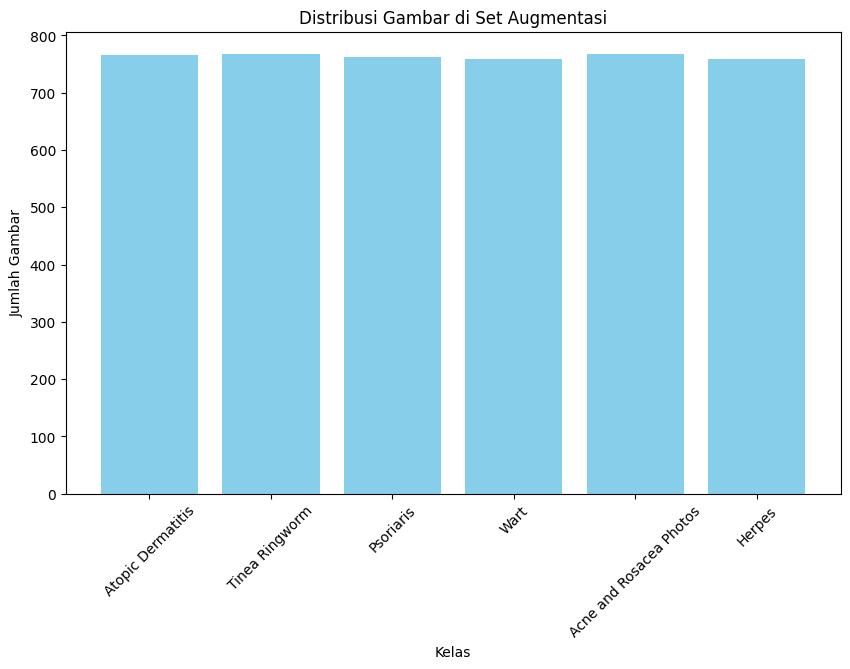

In [ ]:
import os
import matplotlib.pyplot as plt

# Path ke folder hasil augmentasi
augmented_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_augmented"

# Menghitung jumlah gambar per kelas
class_counts = {}
for class_name in os.listdir(augmented_dir):
    class_folder = os.path.join(augmented_dir, class_name)
    if os.path.isdir(class_folder):
        # Hitung jumlah gambar dalam setiap kelas
        class_counts[class_name] = len([file for file in os.listdir(class_folder) if file.lower().endswith(('jpg', 'jpeg', 'png'))])

# Menampilkan total jumlah gambar di semua kelas
total_images = sum(class_counts.values())
print(f"Total gambar di folder '{augmented_dir}': {total_images}")

# Membuat grafik bar untuk distribusi kelas
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Distribusi Gambar di Set Augmentasi')
plt.xticks(rotation=45)
plt.show()


# **SPLIT DATASETS**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Direktori dataset hasil augmentasi
augmented_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_augmented"

# Direktori output untuk training, validasi, dan test set
output_dir = "skin_disease_dataset/split_dataset"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")

# Membuat folder output jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Persentase split
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Proses split untuk setiap kelas
for class_name in os.listdir(augmented_dir):
    class_folder = os.path.join(augmented_dir, class_name)
    images = os.listdir(class_folder)

    # Membuat folder untuk setiap kelas di train, val, dan test
    train_class_folder = os.path.join(train_dir, class_name)
    val_class_folder = os.path.join(val_dir, class_name)
    test_class_folder = os.path.join(test_dir, class_name)
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(val_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

    # Split dataset menjadi train, val, dan test
    train_images, temp_images = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

    # Memindahkan gambar ke folder masing-masing
    for image_name in train_images:
        shutil.copy(os.path.join(class_folder, image_name), os.path.join(train_class_folder, image_name))

    for image_name in val_images:
        shutil.copy(os.path.join(class_folder, image_name), os.path.join(val_class_folder, image_name))

    for image_name in test_images:
        shutil.copy(os.path.join(class_folder, image_name), os.path.join(test_class_folder, image_name))

print(f"Dataset telah dibagi ke dalam folder:")
print(f" - Training set: {train_dir}")
print(f" - Validation set: {val_dir}")
print(f" - Test set: {test_dir}")


Dataset telah dibagi ke dalam folder:
 - Training set: skin_disease_dataset/split_dataset/train
 - Validation set: skin_disease_dataset/split_dataset/val
 - Test set: skin_disease_dataset/split_dataset/test


# **MODEL**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path dataset yang sudah dipisah
train_dir = "skin_disease_dataset/split_dataset/train"
val_dir = "skin_disease_dataset/split_dataset/val"
test_dir = "skin_disease_dataset/split_dataset/test"

# Hyperparameter
IMG_SIZE = (224, 224)  # Ukuran input gambar untuk VGG16
BATCH_SIZE = 32
EPOCHS = 30
LEARNING_RATE = 0.0001

# Preprocessing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False,  # Test set tidak perlu di-shuffle
)

# Load VGG16 pre-trained model tanpa fully connected layer (include_top=False)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze semua lapisan VGG16 agar tidak dilatih ulang
base_model.trainable = False


Found 3204 images belonging to 6 classes.
Found 917 images belonging to 6 classes.
Found 460 images belonging to 6 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Menambahkan lapisan fully connected di atas model2 VGG16
x = Flatten()(base_model.output)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation="softmax")(x)

# Membuat model2
model2 = Model(inputs=base_model.input, outputs=output)

# Ubah learning rate scheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Compile model2
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Menampilkan ringkasan model2
model2.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,563,334 (105.15 MB)

 Trainable params: 12,848,646 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Training model2
history = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    verbose=1,
    callbacks=[lr_scheduler]
)

# Evaluasi model2 pada test set
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 74s 643ms/step - accuracy: 0.3117 - loss: 1.7918 - val_accuracy: 0.5943 - val_loss: 1.1678 - learning_rate: 1.0000e-04
Epoch 2/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 59s 466ms/step - accuracy: 0.5276 - loss: 1.2866 - val_accuracy: 0.6260 - val_loss: 1.0596 - learning_rate: 1.0000e-04
Epoch 3/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 49s 458ms/step - accuracy: 0.5827 - loss: 1.1574 - val_accuracy: 0.6227 - val_loss: 1.0387 - learning_rate: 1.0000e-04
Epoch 4/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 49s 457ms/step - accuracy: 0.5779 - loss: 1.1692 - val_accuracy: 0.6325 - val_loss: 1.0130 - learning_rate: 1.0000e-04
Epoch 5/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 49s 463ms/step - accuracy: 0.5646 - loss: 1.1611 - val_accuracy: 0.6456 - val_loss: 0.9671 - learning_rate: 1.0000e-04
Epoch 6/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 49s 459ms/step - accuracy: 0.5984 - loss: 1.0951 - val_accuracy: 0.6521 - val_loss: 0.9433 - learning_rate: 1.0000e-04
Epoch 7/40
101/101 ━━━━━━━━━━━━━━━━━━━━ 49s 458ms/step - 

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Mengambil prediksi dari model pada data test
y_pred_test = model2.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(y_pred_test, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Mengambil label asli dari data test
y_true_test = test_generator.classes

# Menghitung dan menampilkan classification report (termasuk F1-score)
report = classification_report(y_true_test, y_pred_classes, target_names=list(test_generator.class_indices.keys()))
print("Classification Report (F1-Score):")
print(report)

# Jika ingin melihat hasil akurasi pada data test
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step
Classification Report (F1-Score):
                         precision    recall  f1-score   support

Acne and Rosacea Photos       0.67      0.84      0.75        77
      Atopic Dermatitis       0.74      0.78      0.76        77
                 Herpes       0.57      0.72      0.64        76
              Psoriaris       0.71      0.62      0.66        77
         Tinea Ringworm       0.69      0.62      0.65        77
                   Wart       0.79      0.50      0.61        76

               accuracy                           0.68       460
              macro avg       0.69      0.68      0.68       460
           weighted avg       0.69      0.68      0.68       460

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.7614 - loss: 0.7357
Test Loss: 0.8684033751487732
Test Accuracy: 0.6826087236404419


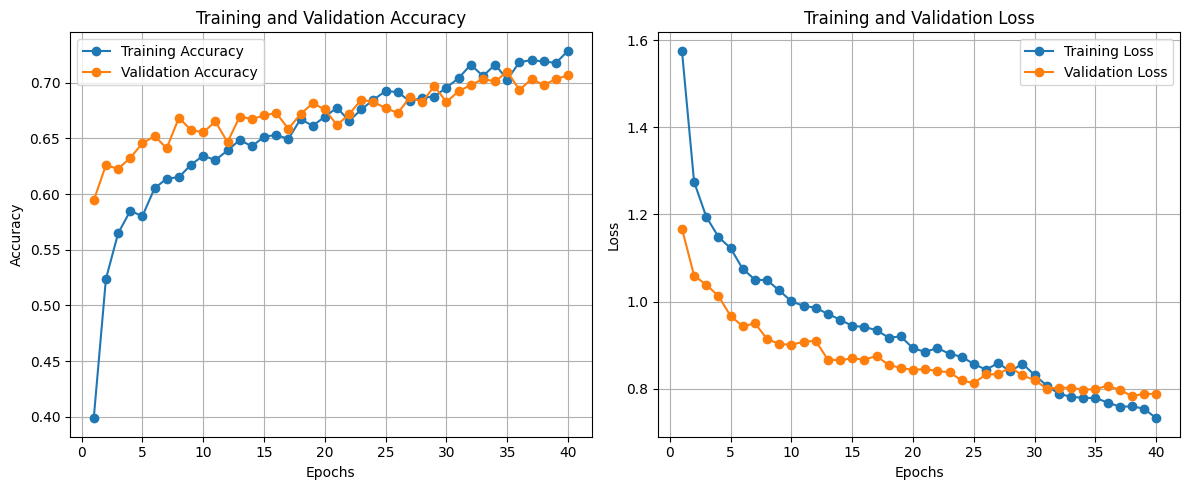

In [ ]:
import matplotlib.pyplot as plt

# Ekstrak data akurasi dan loss dari history
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label="Training Accuracy", marker="o")
plt.plot(epochs, val_accuracy, label="Validation Accuracy", marker="o")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Training Loss", marker="o")
plt.plot(epochs, val_loss, label="Validation Loss", marker="o")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

# Tampilkan grafik
plt.tight_layout()
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step
Some sample predictions:
Image 1 - Predicted: Acne and Rosacea Photos, True: Acne and Rosacea Photos
Image 2 - Predicted: Wart, True: Acne and Rosacea Photos
Image 3 - Predicted: Acne and Rosacea Photos, True: Acne and Rosacea Photos
Image 4 - Predicted: Acne and Rosacea Photos, True: Acne and Rosacea Photos
Image 5 - Predicted: Acne and Rosacea Photos, True: Acne and Rosacea Photos
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step


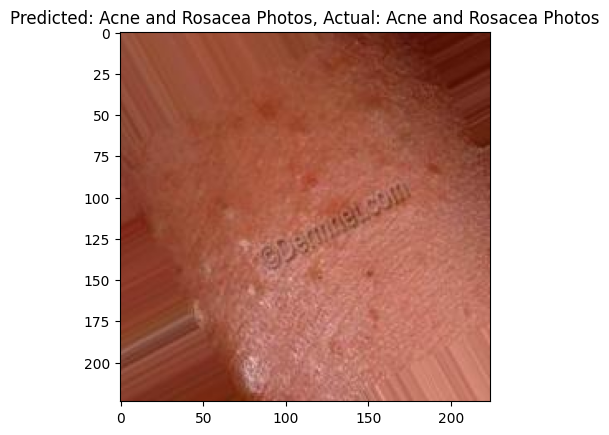

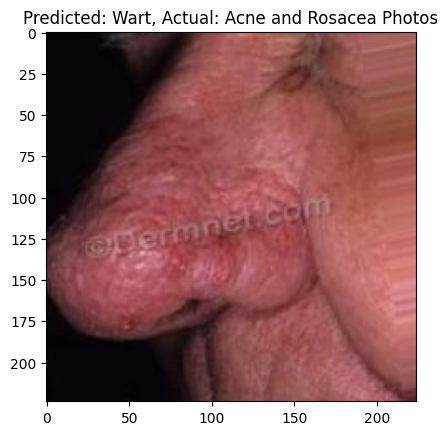

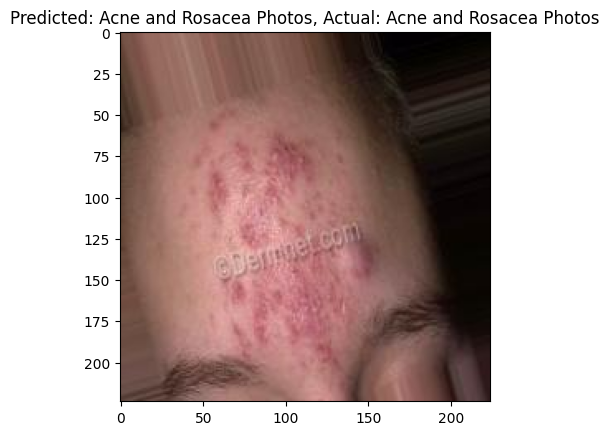

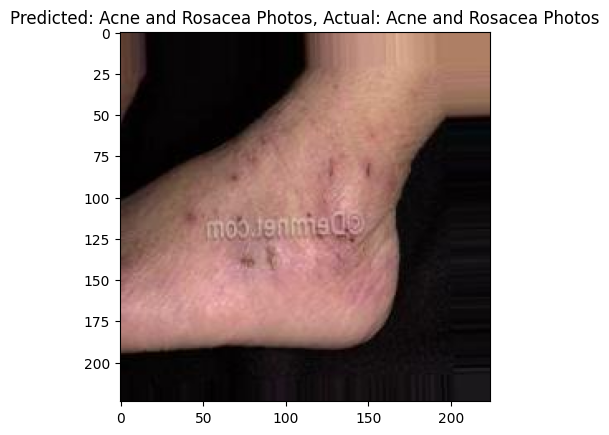

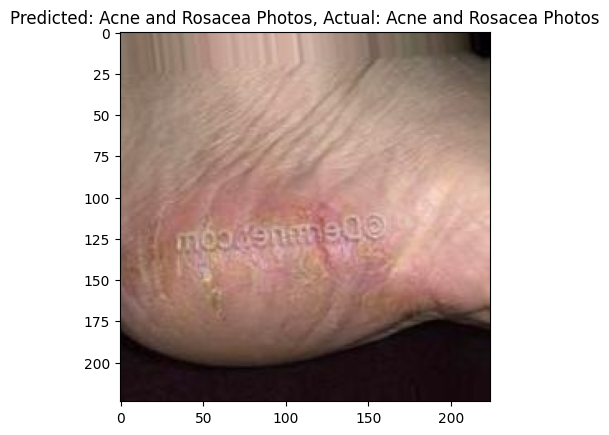

Predictions:
Predicted: Acne and Rosacea Photos, Actual: Acne and Rosacea Photos
Predicted: Wart, Actual: Acne and Rosacea Photos
Predicted: Acne and Rosacea Photos, Actual: Acne and Rosacea Photos
Predicted: Acne and Rosacea Photos, Actual: Acne and Rosacea Photos
Predicted: Acne and Rosacea Photos, Actual: Acne and Rosacea Photos
Predicted: Acne and Rosacea Photos, Actual: Acne and Rosacea Photos
Predicted: Acne and Rosacea Photos, Actual: Acne and Rosacea Photos
Predicted: Acne and Rosacea Photos, Actual: Acne and Rosacea Photos
Predicted: Acne and Rosacea Photos, Actual: Acne and Rosacea Photos
Predicted: Acne and Rosacea Photos, Actual: Acne and Rosacea Photos


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mengambil prediksi dari model pada data test
y_pred_test = model2.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(y_pred_test, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Mengambil label asli dari data test
y_true_test = test_generator.classes

# Menampilkan prediksi untuk beberapa gambar pertama
class_labels = list(test_generator.class_indices.keys())  # Mendapatkan label kelas
print("Some sample predictions:")
for i in range(5):  # Menampilkan 5 prediksi pertama
    print(f"Image {i + 1} - Predicted: {class_labels[y_pred_classes[i]]}, True: {class_labels[y_true_test[i]]}")

# Lakukan prediksi pada data test
y_pred_test = model2.predict(test_generator, verbose=1)

# Ambil kelas dengan probabilitas tertinggi
y_pred_classes = np.argmax(y_pred_test, axis=1)

# Ambil label asli dari data test
y_true_test = test_generator.classes

# Ambil nama kelas (misalnya 'class_1', 'class_2', dll)
class_names = list(test_generator.class_indices.keys())

# Menampilkan beberapa gambar dengan prediksi yang sesuai
for i in range(5):  # Menampilkan 5 gambar pertama
    plt.imshow(test_generator[i][0][0])  # Ambil gambar pertama dari batch
    plt.title(f"Predicted: {class_names[y_pred_classes[i]]}, Actual: {class_names[y_true_test[i]]}")
    plt.show()

# Menampilkan beberapa prediksi pertama
print("Predictions:")
for i in range(10):  # Menampilkan 10 prediksi pertama
    print(f"Predicted: {class_names[y_pred_classes[i]]}, Actual: {class_names[y_true_test[i]]}")


In [ ]:
# Inisialisasi penghitung prediksi benar dan salah per kelas
correct_predictions = {class_name: 0 for class_name in class_names}
misclassifications = {class_name: 0 for class_name in class_names}

# Bandingkan prediksi dengan ground truth
for i in range(len(y_true_test)):
    true_class = class_names[y_true_test[i]]
    predicted_class = class_names[y_pred_classes[i]]

    if true_class == predicted_class:
        correct_predictions[true_class] += 1
    else:
        misclassifications[true_class] += 1

# Tampilkan hasil
print("Correct Predictions per Class:")
for class_name in correct_predictions:
    print(f"{class_name}: {correct_predictions[class_name]}")

print("\nMisclassifications per Class:")
for class_name in misclassifications:
    print(f"{class_name}: {misclassifications[class_name]}")


Correct Predictions per Class:
Acne and Rosacea Photos: 65
Atopic Dermatitis: 60
Herpes: 55
Psoriaris: 48
Tinea Ringworm: 48
Wart: 38

Misclassifications per Class:
Acne and Rosacea Photos: 12
Atopic Dermatitis: 17
Herpes: 21
Psoriaris: 29
Tinea Ringworm: 29
Wart: 38


# **FINETUNING**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Membuka beberapa lapisan akhir dari base_model untuk fine-tuning
base_model.trainable = True  # Membuka semua lapisan

# Membekukan sebagian besar lapisan awal (hanya melatih 20 lapisan terakhir)
for layer in base_model.layers[:-10]:  # Bekukan hanya sebagian kecil
    layer.trainable = False

# Menambahkan lapisan fully connected di atas base_model
x = Flatten()(base_model.output)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
output = Dense(train_generator.num_classes, activation="softmax")(x)

# Membuat model untuk fine-tuning
fine_tuned_model = model2
# Compile ulang model dengan learning rate lebih kecil untuk fine-tuning
fine_tuned_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Callback Early Stopping
early_stopping = EarlyStopping(
    monitor="val_accuracy",  # Monitor validation accuracy
    patience=3,              # Berhenti jika tidak ada peningkatan setelah 5 epoch
    restore_best_weights=True  # Mengembalikan bobot terbaik
)

from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",   # Memantau validation loss
    factor=0.5,           # Mengurangi learning rate menjadi setengah
    patience=3,           # Menunggu 3 epoch sebelum penurunan
    min_lr=1e-8           # Nilai minimum untuk learning rate
)

In [ ]:
# Fine-tuning model
history_finetune = fine_tuned_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=45,  # Tambahkan jumlah epoch sesuai kebutuhan
    verbose=1,
    initial_epoch=history.epoch[-1],  # Melanjutkan dari epoch sebelumnya
    callbacks=[early_stopping, lr_scheduler],  # Tambahkan callback early stopping
)

# Evaluasi model pada test set
test_loss, test_accuracy = fine_tuned_model.evaluate(test_generator)
print(f"Test Accuracy after Fine-Tuning: {test_accuracy:.2f}")

# Menampilkan hasil akhir validation accuracy
final_val_accuracy = max(history_finetune.history["val_accuracy"])
print(f"Final Validation Accuracy after Fine-Tuning: {final_val_accuracy:.2f}")


Epoch 40/45
101/101 ━━━━━━━━━━━━━━━━━━━━ 75s 544ms/step - accuracy: 0.7182 - loss: 0.7704 - val_accuracy: 0.7230 - val_loss: 0.7748 - learning_rate: 1.0000e-05
Epoch 41/45
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 491ms/step - accuracy: 0.7497 - loss: 0.6849 - val_accuracy: 0.7077 - val_loss: 0.8039 - learning_rate: 1.0000e-05
Epoch 42/45
101/101 ━━━━━━━━━━━━━━━━━━━━ 52s 495ms/step - accuracy: 0.7487 - loss: 0.6798 - val_accuracy: 0.7350 - val_loss: 0.7338 - learning_rate: 1.0000e-05
Epoch 43/45
101/101 ━━━━━━━━━━━━━━━━━━━━ 82s 495ms/step - accuracy: 0.7674 - loss: 0.6253 - val_accuracy: 0.7285 - val_loss: 0.7375 - learning_rate: 1.0000e-05
Epoch 44/45
101/101 ━━━━━━━━━━━━━━━━━━━━ 82s 492ms/step - accuracy: 0.7692 - loss: 0.6267 - val_accuracy: 0.7339 - val_loss: 0.7758 - learning_rate: 1.0000e-05
Epoch 45/45
101/101 ━━━━━━━━━━━━━━━━━━━━ 58s 545ms/step - accuracy: 0.8075 - loss: 0.5467 - val_accuracy: 0.7448 - val_loss: 0.7294 - learning_rate: 1.0000e-05
10/15 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Mengambil prediksi dari model pada data test
y_pred_test = fine_tuned_model.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(y_pred_test, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Mengambil label asli dari data test
y_true_test = test_generator.classes

# Menghitung dan menampilkan classification report (termasuk F1-score)
report = classification_report(y_true_test, y_pred_classes, target_names=list(test_generator.class_indices.keys()))
print("Classification Report (F1-Score):")
print(report)

# Jika ingin melihat hasil akurasi pada data test
test_loss, test_accuracy = fine_tuned_model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mengambil prediksi dari model pada data test
y_pred_test = fine_tuned_model.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(y_pred_test, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Mengambil label asli dari data test
y_true_test = test_generator.classes

# Menampilkan prediksi untuk beberapa gambar pertama
class_labels = list(test_generator.class_indices.keys())  # Mendapatkan label kelas
print("Some sample predictions:")
for i in range(5):  # Menampilkan 5 prediksi pertama
    print(f"Image {i + 1} - Predicted: {class_labels[y_pred_classes[i]]}, True: {class_labels[y_true_test[i]]}")

# Membuat confusion matrix untuk data test
cm = confusion_matrix(y_true_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Jika ingin melihat hasil akurasi pada data test
test_loss, test_accuracy = fine_tuned_model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lakukan prediksi pada data test
y_pred_test = model2.predict(test_generator, verbose=1)

# Ambil kelas dengan probabilitas tertinggi
y_pred_classes = np.argmax(y_pred_test, axis=1)

# Ambil label asli dari data test
y_true_test = test_generator.classes

# Ambil nama kelas (misalnya 'class_1', 'class_2', dll)
class_names = list(test_generator.class_indices.keys())

# Menampilkan beberapa gambar dengan prediksi yang sesuai
for i in range(5):  # Menampilkan 5 gambar pertama
    plt.imshow(test_generator[i][0][0])  # Ambil gambar pertama dari batch
    plt.title(f"Predicted: {class_names[y_pred_classes[i]]}, Actual: {class_names[y_true_test[i]]}")
    plt.show()

# Menampilkan beberapa prediksi pertama
print("Predictions:")
for i in range(10):  # Menampilkan 10 prediksi pertama
    print(f"Predicted: {class_names[y_pred_classes[i]]}, Actual: {class_names[y_true_test[i]]}")


In [ ]:
# Inisialisasi penghitung prediksi benar dan salah per kelas
correct_predictions = {class_name: 0 for class_name in class_names}
misclassifications = {class_name: 0 for class_name in class_names}

# Bandingkan prediksi dengan ground truth
for i in range(len(y_true_test)):
    true_class = class_names[y_true_test[i]]
    predicted_class = class_names[y_pred_classes[i]]

    if true_class == predicted_class:
        correct_predictions[true_class] += 1
    else:
        misclassifications[true_class] += 1

# Tampilkan hasil
print("Correct Predictions per Class:")
for class_name in correct_predictions:
    print(f"{class_name}: {correct_predictions[class_name]}")

print("\nMisclassifications per Class:")
for class_name in misclassifications:
    print(f"{class_name}: {misclassifications[class_name]}")


# **SAVE MODEL**

In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path ke folder di Google Drive
drive_folder = "/content/drive/My Drive/Model_Fine_Tuned"

# Pastikan folder target ada, jika tidak, buat folder baru
os.makedirs(drive_folder, exist_ok=True)

# 1. Simpan model dalam format .keras
fine_tuned_model.save(f"{drive_folder}/fine_tuned_model.keras")
print(f"Model .keras disimpan di {drive_folder}/fine_tuned_model.keras")

# 2. Simpan model dalam format .h5
fine_tuned_model.save(f"{drive_folder}/fine_tuned_model.h5", save_format='h5')
print(f"Model .h5 disimpan di {drive_folder}/fine_tuned_model.h5")

# 3. Simpan model dalam format .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(fine_tuned_model)
tflite_model = converter.convert()
with open(f"{drive_folder}/fine_tuned_model.tflite", "wb") as f:
    f.write(tflite_model)
print(f"Model .tflite disimpan di {drive_folder}/fine_tuned_model.tflite")

# 4. Simpan model dalam format TensorFlow.js
tfjs_target_dir = f"{drive_folder}/fine_tuned_model_tfjs"
tfjs.converters.save_keras_model(fine_tuned_model, tfjs_target_dir)
print(f"Model TensorFlow.js disimpan di folder {tfjs_target_dir}")


In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path ke folder tujuan di Google Drive
drive_folder = "/content/drive/My Drive/Fine_Tuned_Models"

# Pastikan folder target ada, jika tidak, buat folder baru
os.makedirs(drive_folder, exist_ok=True)

# 1. Simpan model dalam format .keras
fine_tuned_model.save(f"{drive_folder}/fine_tuned_model.keras")
print(f"Model .keras disimpan di {drive_folder}/fine_tuned_model.keras")

# 2. Simpan model dalam format .h5
fine_tuned_model.save(f"{drive_folder}/fine_tuned_model.h5", save_format='h5')
print(f"Model .h5 disimpan di {drive_folder}/fine_tuned_model.h5")

# 3. Simpan model dalam format .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(fine_tuned_model)
tflite_model = converter.convert()
with open(f"{drive_folder}/fine_tuned_model.tflite", "wb") as f:
    f.write(tflite_model)
print(f"Model .tflite disimpan di {drive_folder}/fine_tuned_model.tflite")

# 4. Simpan model dalam format TensorFlow.js
tfjs_target_dir = f"{drive_folder}/fine_tuned_model_tfjs"
os.makedirs(tfjs_target_dir, exist_ok=True)  # Pastikan folder sub-directory untuk TFJS dibuat
tfjs.converters.save_keras_model(fine_tuned_model, tfjs_target_dir)
print(f"Model TensorFlow.js disimpan di folder {tfjs_target_dir}")


In [ ]:
# Path ke folder tujuan di Google Drive
drive_folder = "/content/drive/My Drive/Fine_Tuned_Models"

# Validasi .keras
reloaded_keras_model = tf.keras.models.load_model("/content/drive/My Drive/1. Fine_Tuned_Models/fine_tuned_model.keras")

# Validasi .h5
reloaded_h5_model = tf.keras.models.load_model("/content/drive/My Drive/1. Fine_Tuned_Models/fine_tuned_model.h5")




# **SAVE MODEL FROZEN**

In [ ]:
export_dir = 'simpan_model/2'

# Simpan model dalam format SavedModel
fine_tuned_model.export(export_dir)


In [ ]:
import tensorflow as tf

# Konversi dari SavedModel ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("simpan_model/2")
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Opsional: optimasi
tflite_model = converter.convert()

# Simpan model TFLite
with open("model_frozen2.tflite", "wb") as f:
    f.write(tflite_model)


In [ ]:
interpreter = tf.lite.Interpreter(model_path="model_frozen2.tflite")
interpreter.allocate_tensors()

# Cek detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)


In [ ]:
def preprocess_image(image_path, input_shape):
    # Muat gambar
    image = Image.open(image_path).convert("RGB")

    # Ubah ukuran gambar sesuai input model
    image = image.resize((input_shape[1], input_shape[2]))

    # Konversi ke numpy array dan normalisasi
    image_array = np.array(image).astype(np.float32) / 255.0  # Normalisasi ke [0, 1]

    # Tambahkan batch dimension
    return np.expand_dims(image_array, axis=0)


In [ ]:
# Path ke gambar
image_path = "v-05atopicFeet0801053.jpg"

# Pra-pemrosesan gambar
input_shape = input_details[0]['shape']
input_data = preprocess_image(image_path, input_shape)

# Atur input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Jalankan model
interpreter.invoke()

# Ambil hasil prediksi
output_data = interpreter.get_tensor(output_details[0]['index'])

# Tampilkan hasil
print("Output prediksi (probabilitas):", output_data)


In [ ]:
# Daftar label kelas
class_labels = ["Class 1", "Class 2", "Class 3","Class 4", "Class 5", "Class 6"]

# Cari kelas dengan probabilitas tertinggi
predicted_class = np.argmax(output_data[0])
predicted_prob = output_data[0][predicted_class]

print(f"Prediksi: {class_labels[predicted_class]} dengan probabilitas {predicted_prob:.2f}")


In [ ]:
# Jika Anda menggunakan ImageDataGenerator dan melatih model dengan data generator
class_indices = train_generator.class_indices  # 'train_generator' adalah nama generator data Anda
print(class_indices)
